# Project : Wrangling and Analyze Data(WeRateDogs)

## Data Gathering
In this stage, I performed the following
* Import all the libraries I will be using for the analysis
* Download the twitter_archive dataset using pandas,
* Download the image prediction dataset using requests library,
* Read the json-text file line by line into pandas dataframe to get the additional tweets.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import os
import re
from PIL import Image
from io import BytesIO


%matplotlib inline

In [2]:
#loading dataset into pandas df
tweet_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#using request library to download the image prediction.
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
    


In [4]:
#reading the image prediction into a data frame.
image_df = pd.read_csv('image-predictions.tsv', sep= '\t' )

In [5]:
list = []
with open('tweet_json.txt', 'r') as Json_file:
    for line in Json_file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        list.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        
#saving the tweet-json.txt file into a dataframe called twitter_extra
tweet_extra = pd.DataFrame(list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this stage of my project, I will be assessing my datasets using two methods;
* Visual Assessment
* Programmatic Assessment

### visual assessment

In [6]:
#first look at the twitter archive dataset
tweet_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
#first look at the image prediction dataset
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
#first look at the tweet_extra dataset
tweet_extra

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6990,33777
1,892177421306343426,5293,29296
2,891815181378084864,3470,22030
3,891689557279858688,7216,36895
4,891327558926688256,7743,35268
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### programmatic assessment

#### 1. tweet_arch

In [9]:
# checking the first five rows
tweet_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# quick overview of the dataset
tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
#checking for duplicated rows
sum(tweet_arch.duplicated())

0

In [12]:
#checking for number of unique value
tweet_arch.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [13]:
# checking for the rating denominator
tweet_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [14]:
tweet_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

#### 2. image_df

In [15]:
#checking for the first five rows
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
# quick overall of the image prediction dataset
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#checking for empty values
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
# randomly selecting to view the dataset
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1635,806219024703037440,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,0.021274,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
539,676957860086095872,https://pbs.twimg.com/ext_tw_video_thumb/67695...,1,Labrador_retriever,0.772423,True,beagle,0.055902,True,golden_retriever,0.031152,True
1261,748932637671223296,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1,borzoi,0.742912,True,wire-haired_fox_terrier,0.204082,True,English_setter,0.021032,True
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False


#### 3. tweet_extra

In [19]:
tweet_extra.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6990,33777
1,892177421306343426,5293,29296
2,891815181378084864,3470,22030
3,891689557279858688,7216,36895
4,891327558926688256,7743,35268


In [20]:
tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### From the assessment that I did, I came across some quality and tidiness issues with the datasets.

##### QUALITY ISSUES

###### tweet_arch table

1. The time_stamp column is attributed as an object instead of a datetime.

2. Some values in the numerator column are not equal to 10( The dog rating is over 10)

3. Some columns have invalid names as dogs name such as 'a', 'none', 'quite'

4. NaN is not uniform throughout the datasets

5. twitter_id is represented as integer instead of object, 

6. (in_reply_to_status_id and in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id) are represented as float.

*image_df

7. There are duplicates in the expanded urls of the image prediction dataset

8. The image_df has missing data. it has 2075 rows instead of 2356.

9. Nan is represented as none which is a string

10. the tweet_arch numerator has some excessively high values such as 1776

##### TIDINESS ISSUES

11. The different dog stages can be merged into a single column

12. The p2 and p3 dataset will not be needed for my analysis, so I will be dropping them.

13. The three dataset can be merged into a single dataset

14. The text column has both email and text in the same column and should be separated.




### Cleaning Data
In this section, I will be cleaning  **all** of the issues I documented while assessing.


In [21]:
# Making a copy of original pieces of dataset
tweet_arch_clean = tweet_arch.copy()
image_df_clean = image_df.copy()
tweet_extra_clean = tweet_extra.copy()

***QUALITY ISSUES***

#### Issue #1: Converting the time_stamp to datetime datatype.
* Separating it into separate columns for the date and time

#### Define
* The time_stamp column will be converted to datetime datatype.

In [22]:
#converting to datetime
tweet_arch_clean.timestamp = pd.to_datetime(tweet_arch_clean.timestamp)
tweet_arch_clean.timestamp.dtype


datetime64[ns, UTC]

In [23]:
tweet_arch_clean['Dates'] = pd.to_datetime(tweet_arch_clean['timestamp']).dt.date
tweet_arch_clean['Time'] = pd.to_datetime(tweet_arch_clean['timestamp']).dt.time


In [24]:
tweet_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


In [25]:
#dropping the time_stamp column
tweet_arch_clean= tweet_arch_clean.drop('timestamp', 1)

C:\Users\DSN\AppData\Local\Temp/ipykernel_35528/1931205920.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tweet_arch_clean= tweet_arch_clean.drop('timestamp', 1)


#### Test

In [26]:
tweet_arch_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time
829,768909767477751808,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None,2016-08-25,20:35:48


#### Test

In [27]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  floofer                     2356 

#### Issue #2": Converting  values not equal to 10 in the denominator column to the standard rating - 10.

#### Define 
* I will be converting the denominator values that are not 10 into 10.

In [28]:
# removing the demonimator greater than 10
tweet_arch_clean = tweet_arch_clean[tweet_arch_clean['rating_denominator'] == 10]

#### Test

In [29]:
tweet_arch_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2333.000000,2333.0
mean,12.237462,10.0
std,41.022472,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


#### Issue #3: Removing invalid names from the dog name column

#### Define 
* the invalid names will be dropped and replaced with nan

In [30]:
tweet_arch_clean[~tweet_arch_clean.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [31]:
tweet_arch_clean.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

#### Test

In [32]:
#checking for names value counts 
tweet_arch_clean.name.value_counts()

Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
              ..
Beckham        1
Devón          1
Gert           1
Dex            1
Christoper     1
Name: name, Length: 929, dtype: int64

#### Issue #4: NaN is represented as none in different colums of the table 

#### Define
* The columns with none as nan will be replaced

In [33]:
#replacing none with nan
tweet_arch_clean.replace('None', 'Nan', inplace = True)

#### Test

In [34]:
tweet_arch_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time
1481,693280720173801472,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie and her 2 pups Shebang &amp; Ruf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693280720...,10,10,Sadie,Nan,Nan,Nan,Nan,2016-01-30,03:52:58
1576,687460506001633280,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Kramer. He's a Picasso Tortellini. Tie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687460506...,10,10,Kramer,Nan,Nan,Nan,Nan,2016-01-14,02:25:31
1990,672640509974827008,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonidas. He just got rekt by a snowba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672640509...,9,10,Leonidas,Nan,Nan,Nan,Nan,2015-12-04,04:56:09
422,821813639212650496,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hercules. He can have what...,7.806013e+17,4.196984e+09,2016-09-27 02:53:48 +0000,https://twitter.com/dog_rates/status/780601303...,12,10,Hercules,Nan,Nan,Nan,Nan,2017-01-18,20:16:54
1404,699370870310113280,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Calbert. He doesn't have enough l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699370870...,11,10,Calbert,Nan,Nan,Nan,Nan,2016-02-15,23:13:03


#### Issue #5: Converting twitter_id to object datatype

#### Define
 I will be converting the twiter_id in these dataframe to object
 *tweet archive dataset
 *image prediction dataframe
 *tweet_extra datafrae


*Tweet_arch*

In [35]:
tweet_arch_clean['tweet_id'] = tweet_arch_clean['tweet_id'].astype(object)

#### Test

In [36]:
tweet_arch_clean['tweet_id'].dtype

dtype('O')

*image_df*

In [37]:
image_df_clean['tweet_id'] = image_df_clean['tweet_id'].astype(object)

#### Test

In [38]:
image_df_clean['tweet_id'].dtype

dtype('O')

*tweet_extra*

In [39]:
tweet_extra_clean['tweet_id'] = tweet_extra_clean['tweet_id'].astype(object)

#### Test

In [40]:
tweet_extra_clean['tweet_id'].dtype

dtype('O')

#### Issue #6: Converting the (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) to object datatype.

#### Define
* the above columns will be converted to the appropriate datatype which is object

In [41]:
tweet_arch_clean['in_reply_to_status_id'] = tweet_arch_clean['in_reply_to_status_id'].astype(object)
tweet_arch_clean['in_reply_to_user_id'] = tweet_arch_clean['in_reply_to_user_id'].astype(object)
tweet_arch_clean['retweeted_status_id'] = tweet_arch_clean['retweeted_status_id'].astype(object)
tweet_arch_clean['retweeted_status_user_id'] = tweet_arch_clean['retweeted_status_user_id'].astype(object)



* Test

In [42]:
tweet_arch_clean['in_reply_to_status_id'].dtype
tweet_arch_clean['in_reply_to_user_id'].dtype
tweet_arch_clean['retweeted_status_id'].dtype
tweet_arch_clean['retweeted_status_user_id'].dtype



dtype('O')

#### Test

In [43]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2333 non-null   object
 1   in_reply_to_status_id       73 non-null     object
 2   in_reply_to_user_id         73 non-null     object
 3   source                      2333 non-null   object
 4   text                        2333 non-null   object
 5   retweeted_status_id         180 non-null    object
 6   retweeted_status_user_id    180 non-null    object
 7   retweeted_status_timestamp  180 non-null    object
 8   expanded_urls               2278 non-null   object
 9   rating_numerator            2333 non-null   int64 
 10  rating_denominator          2333 non-null   int64 
 11  name                        1499 non-null   object
 12  doggo                       2333 non-null   object
 13  floofer                     2333 non-null   obje

#### Issue #7: There are duplicates in the expanded urls of the twitter archive dataset 

#### Define
* duplicates will be dropped inorder to make our analysis neat

In [44]:
# removing duplicates
tweet_arch_clean.drop_duplicates(subset= 'expanded_urls', inplace = True)

* Test

In [45]:
sum(tweet_arch_clean.expanded_urls.duplicated())

0

#### Issue #8: the tweet_arch numerator has some excessively high values such as 1776.

#### Define
* the value will be dropped and replaced with mean

In [46]:
tweet_arch_clean.loc[tweet_arch_clean.rating_numerator == 1776, 'rating_numerator'] = tweet_arch_clean.rating_numerator.mean()

tweet_arch_clean.rating_numerator = tweet_arch_clean.rating_numerator.astype(int)

#### Test

In [47]:
tweet_arch_clean.describe()

,rating_numerator,rating_denominator
count,2201.000000,2201.0
mean,10.907769,10.0
std,9.101256,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,420.000000,10.0


### Issue #9: removing duplicates jpg_url in the image prediction dataset

In [48]:
# removing duplicates
image_df_clean.drop_duplicates(subset= 'jpg_url', inplace = True)

* Test

In [49]:
sum(image_df_clean.jpg_url.duplicated())

0

**TIDINESS ISSUES**

#### Merging the four data stages into a single column callled dog_stage

In [50]:
tweet_arch_clean['dog_stage'] = tweet_arch_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
tweet_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time,dog_stage
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Nan,Nan,Nan,Nan,2017-08-01,16:23:56,NaN
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Nan,Nan,Nan,Nan,2017-08-01,00:17:27,NaN
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Nan,Nan,Nan,Nan,2017-07-31,00:18:03,NaN
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Nan,Nan,Nan,Nan,2017-07-30,15:58:51,NaN
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Nan,Nan,Nan,Nan,2017-07-29,16:00:24,NaN


In [51]:
tweet_arch_clean = tweet_arch_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])


* Test

In [52]:
tweet_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dates,Time,dog_stage
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,NaN
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,NaN
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,NaN
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,NaN
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,NaN


#### Dropping the columns that I wont be using for my analysis in the image prediction dataset

In [53]:
#dropping the old columns
image_df_clean.drop(['jpg_url', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1,inplace=True)

In [54]:
image_df_clean.head()

,tweet_id,img_num,p1,p1_conf,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,redbone,0.506826,True
2,666033412701032449,1,German_shepherd,0.596461,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,miniature_pinscher,0.560311,True


In [55]:
tweet_arch_clean.source = tweet_arch_clean.source.apply(lambda x: x.split(">")[1].split("<")[0])
tweet_arch_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dates,Time,dog_stage
0,892420643555336193,NaN,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,NaN
1,892177421306343426,NaN,NaN,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,NaN
2,891815181378084864,NaN,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,NaN
3,891689557279858688,NaN,NaN,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,NaN
4,891327558926688256,NaN,NaN,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,2015-11-16,00:24:50,NaN
2352,666044226329800704,NaN,NaN,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,2015-11-16,00:04:52,NaN
2353,666033412701032449,NaN,NaN,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,2015-11-15,23:21:54,NaN
2354,666029285002620928,NaN,NaN,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,2015-11-15,23:05:30,NaN


In [56]:
tweet_arch_clean['rating'] = tweet_arch_clean['rating_numerator'].astype(str) + '/'+ tweet_arch_clean['rating_denominator'].astype(str) 

In [57]:
tweet_arch_clean.drop(['rating_numerator', 'rating_denominator'], axis =1, inplace= True)

In [58]:
# keeping the rows without replies to tweet
tweet_arch_clean = tweet_arch_clean[tweet_arch_clean.retweeted_status_id.isnull()]
tweet_arch_clean = tweet_arch_clean[tweet_arch_clean.retweeted_status_user_id.isnull()]
tweet_arch_clean = tweet_arch_clean[tweet_arch_clean.retweeted_status_timestamp.isnull()]


In [59]:
#dropping rows with replies to tweet
tweet_arch_clean.drop(tweet_arch_clean.iloc[:, 4:8], inplace= True, axis=1)


In [60]:
tweet_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,expanded_urls,name,Dates,Time,dog_stage,rating
0,892420643555336193,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,16:23:56,NaN,13/10
1,892177421306343426,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,00:17:27,NaN,13/10
2,891815181378084864,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,00:18:03,NaN,12/10
3,891689557279858688,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,15:58:51,NaN,13/10
4,891327558926688256,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,16:00:24,NaN,12/10


In [61]:
tweet_arch_clean_merge = pd.merge(tweet_arch_clean, tweet_extra_clean, on = 'tweet_id', how = 'inner')
tweet_arch_clean_merge.shape

(2017, 12)

In [62]:
tweet_arch_clean_merge1 = pd.merge(tweet_arch_clean_merge, image_df_clean, on = 'tweet_id', how = 'inner')
tweet_arch_clean_merge1.shape

(1894, 16)

In [63]:
tweet_arch_clean_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1894 non-null   object 
 1   in_reply_to_status_id  22 non-null     object 
 2   in_reply_to_user_id    22 non-null     object 
 3   source                 1894 non-null   object 
 4   expanded_urls          1894 non-null   object 
 5   name                   1284 non-null   object 
 6   Dates                  1894 non-null   object 
 7   Time                   1894 non-null   object 
 8   dog_stage              298 non-null    object 
 9   rating                 1894 non-null   object 
 10  retweet_count          1894 non-null   int64  
 11  favorite_count         1894 non-null   int64  
 12  img_num                1894 non-null   int64  
 13  p1                     1894 non-null   object 
 14  p1_conf                1894 non-null   float64
 15  p1_d

## Storing Data
* Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
tweet_arch_clean_merge1.to_csv("twitter_archive_master.csv", index=False)

In [65]:
tweet_arch_clean_merge1 = pd.read_csv("twitter_archive_master.csv")

In [66]:
tweet_arch_clean_merge1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,expanded_urls,name,Dates,Time,dog_stage,rating,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog
0,892420643555336193,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,16:23:56,NaN,13/10,6990,33777,1,orange,0.097049,False
1,892177421306343426,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,00:17:27,NaN,13/10,5293,29296,1,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,00:18:03,NaN,12/10,3470,22030,1,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,15:58:51,NaN,13/10,7216,36895,1,paper_towel,0.170278,False
4,891327558926688256,NaN,NaN,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,16:00:24,NaN,12/10,7743,35268,2,basset,0.555712,True


## Analyzing and Visualizing Data
In this stage, I will be analysing my cleaned datasets to get insights and visualize them

### Insights:
1. Is there any correlation between retweet count and favourite count

2. What is the most popular dog name 

3. The most common dog stage

4. The most common tweet source

5. The most common dog breed

6. Is there any relationship between retweet_count and date

#### Correlation between retweet count and favourite count.


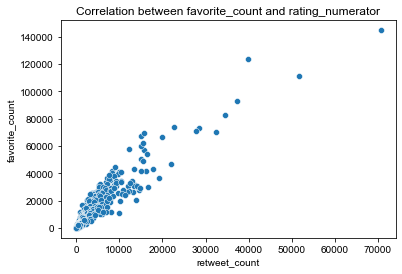

In [67]:
#using seaborn scatterplot to find any correlation
sns.scatterplot(x = 'retweet_count', y = 'favorite_count',
                palette="husl",
                data = tweet_arch_clean_merge1)
plt.title('Correlation between favorite_count and rating_numerator')
sns.set_theme(style="darkgrid")
plt.show()

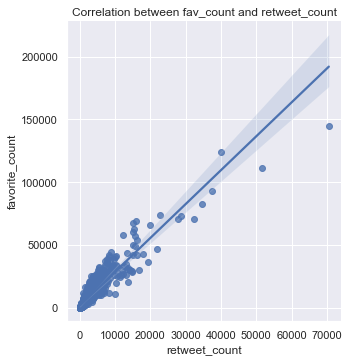

In [68]:
#using implot 
sns.lmplot(x = "retweet_count", y = "favorite_count", data = tweet_arch_clean_merge1)
plt.title('Correlation between fav_count and retweet_count');

* From the above graphs, it shows the favourite_count and retweet_count are positively correlated

#### The most common dog stage

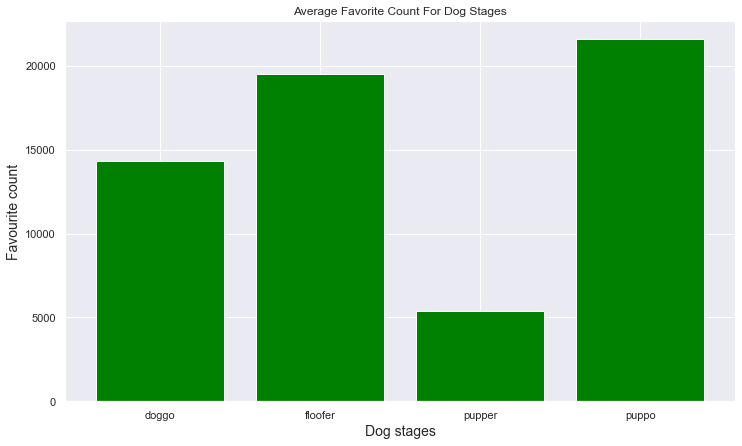

In [69]:
avg_fav_count= tweet_arch_clean_merge1.groupby('dog_stage')['favorite_count'].mean().values
stage = tweet_arch_clean_merge1.groupby('dog_stage')['favorite_count'].mean().index

plt.figure(figsize=[12, 7])
plt.bar(stage, avg_fav_count,color='green')
plt.xlabel('Dog stages',fontsize=14)
plt.ylabel('Favourite count',fontsize=14)
plt.title('Average Favorite Count For Dog Stages')
plt.show();


* The most common dog_stage is puppo

#### The most popular dog breed

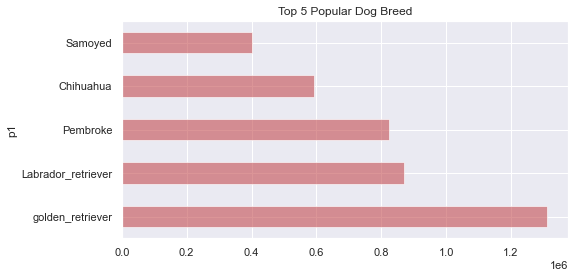

In [70]:
popular_breed = tweet_arch_clean_merge1.groupby('p1')['favorite_count'].sum().sort_values(ascending=True).nlargest(5)

plt.figure(figsize=[8, 4])
popular_breed.plot(x="breed",y='favorite_count',kind='barh',title="Top 5 Popular Dog Breed",color='r', alpha=0.6)
plt.show()

* The most popular breed is *Golden_retriever*

#### Is there any relationship between date and retweet_count

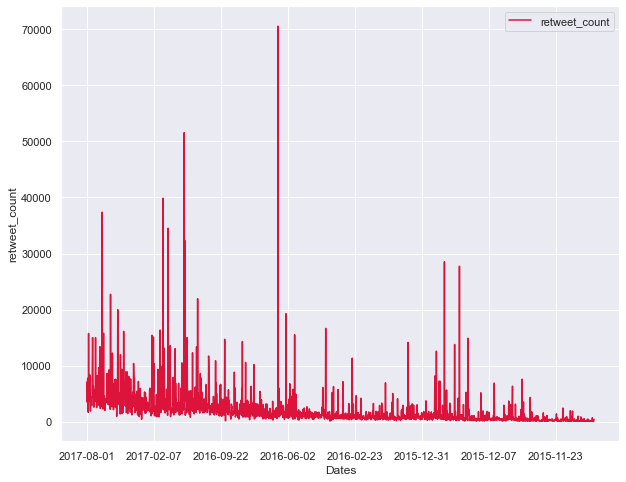

In [71]:
fig, ax = plt.subplots(figsize=(10,8))
tweet_arch_clean_merge1.plot.line(x='Dates', y='retweet_count',color='crimson', ax=ax)
plt.ylabel("retweet_count")
plt.show()

* From the analysis, it seems june 2016 had a very high retweet count

#### Highest Tweet Source

In [72]:
tweet_arch_clean_merge1.source.value_counts()

Twitter for iPhone    1856
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

* The highest source is *Twitter for iPhone*